# Purpose of the File

The purpose of this analysis is to predict the price of used cars by performing comprehensive data wrangling and exploration. The file includes data cleaning, handling missing values, normalization, binning, and creation of dummy variables, followed by extensive analysis to identify key variables that affect car prices, using methods such as correlation and ANOVA.

# Table of Contents

1. **Data Wrangling**
   - **Data Cleaning**: Initial review of the dataset to handle formatting inconsistencies, irrelevant data, and outliers.
   - **Handling Missing Values**: Imputation and removal of missing data to ensure a clean dataset.
   - **Normalization**: Scaled data to ensure uniformity across variables for better model performance.
   - **Binning**: Grouped continuous variables into categories to simplify the model and analysis.
   - **Dummy Variables**: Converted categorical variables into dummy/indicator variables for model compatibility.
   - **Handling Duplicate Values**: Identified and removed duplicate records to avoid redundancy.

2. **Data Exploration**
   - **Variable Analysis**: Performed extensive analysis to identify which variables influence car prices.
   - **Correlation Analysis**: Calculated Pearson correlation to understand relationships between variables.
   - **ANOVA**: Conducted ANOVA tests to evaluate the effect of categorical variables (e.g., drive wheels) on car prices.
   
3. **Model Development**
   - Devlop Simple Linear Regression Model and Multiple Regression Model
   - Evalustion of the Model
   - Decision Making and Conclusion
   The dataset can be found [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv)

### Data Wrangling

In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df =pd.read_csv('AutoMobile.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [6]:
# Count missing values in each column
null_counts=df.isnull().sum()
null_counts[null_counts>0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [7]:
#Calculate the mean value for the "normalized-losses" column  and Replace "NaN" with mean value in "normalized-losses" column
nl_mean =df['normalized-losses'].astype(float).mean(axis=0)
df['normalized-losses'].fillna(nl_mean, inplace=True)

In [8]:
b_mean =df['bore'].astype(float).mean(axis=0)
df['bore'].fillna(b_mean, inplace=True)

In [9]:
s_mean =df['stroke'].astype(float).mean(axis=0)
df['stroke'].fillna(s_mean, inplace=True)

In [10]:
h_mean =df['horsepower'].astype(float).mean(axis=0)
df['horsepower'].fillna(h_mean, inplace=True)

In [11]:
p_mean =df['peak-rpm'].astype(float).mean(axis=0)
df['peak-rpm'].fillna(p_mean, inplace=True)

In [12]:
# Replace number of doors with mode/refquency
df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, 'four',inplace=True)

In [13]:
#  drop whole row with NaN in "price" column
df.dropna(subset=['price'],axis=0, inplace=True)

In [14]:
#reset the index
df.reset_index(drop=True, inplace=True)

In [150]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower_bin       category
fuel_diesel             uint8
fuel_gas                uint8
aspiration_std          uint8
aspiration_turbo        uint8
dtype: object

In [15]:
# Convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [16]:
# Normalized Length
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())

In [17]:
#Normalize width
df['width'] = (df['width'] - df['width'].min()) / (df['width'].max() - df['width'].min())

In [18]:
# Normalize height
df['height'] = (df['height'] - df['height'].min()) / (df['height'].max() - df['height'].min())

In [19]:
# Make bins for horsepower column
df['horsepower'] = df['horsepower'].astype('int')

In [20]:
# Create bins for horsepower column
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
labels = ['Low', 'Medium', 'High']
df['horsepower_bin'] = pd.cut(df['horsepower'], bins=bins, labels=labels, right=False)

Text(0.5, 1.0, 'horsepower bins')

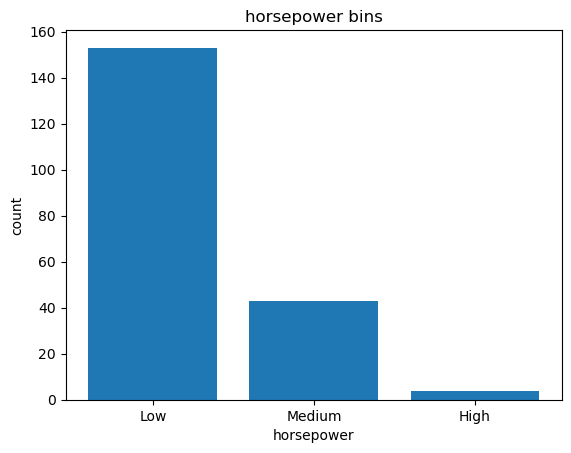

In [157]:
# Visualise bins
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(labels, df["horsepower_bin"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [21]:
# Create dummy variable for fuel type as it contains two unique values
df_dummies = pd.get_dummies(df['fuel-type'], prefix='fuel')
# Combine the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)
# drop original column "fuel-type" from "df"
#df.drop("fuel-type", axis = 1, inplace=True)

In [106]:
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [22]:
# Create dummy variable for fuel type as it contains two unique values
df_dummies = pd.get_dummies(df['aspiration'], prefix='aspiration')
# Combine the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

In [23]:
#drop original column "fuel-type" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [24]:
# Clean the csv file
df.to_csv('clean_df.csv')

### Exploretary Data Analysis
#### What are the main characteristics that have the most impact on the car price?

In [25]:
# Find the correlation
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


(0.0, 53619.320392127855)

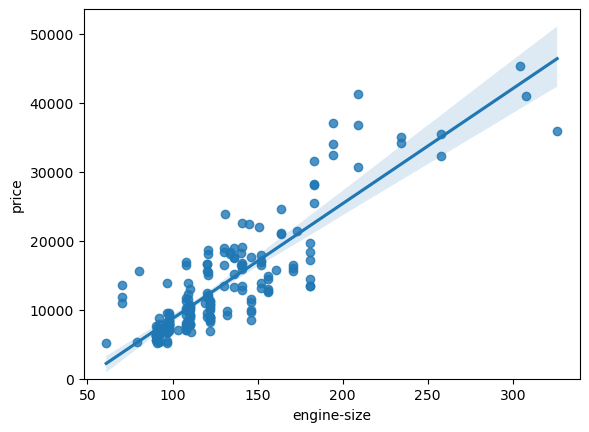

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Explore the linear relationship between varibales. Regression line pretty good indcator for the price as the regression line 
# perfect diagnoal line.
sns.regplot(x='engine-size', y='price',data=df)
plt.ylim(0,)

In [112]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

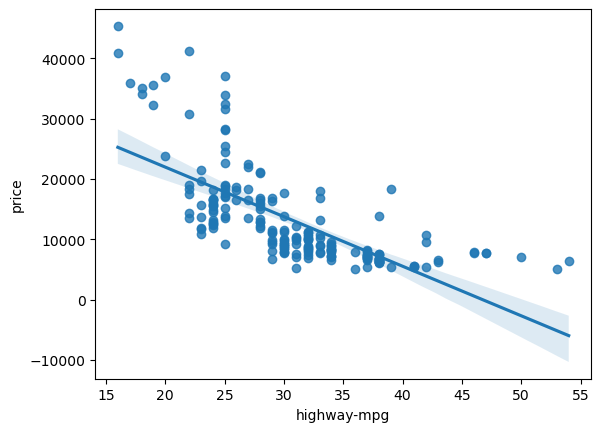

In [27]:
# highway mpg is a good indicator for prediction price
sns.regplot(x="highway-mpg", y="price", data=df)

In [114]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

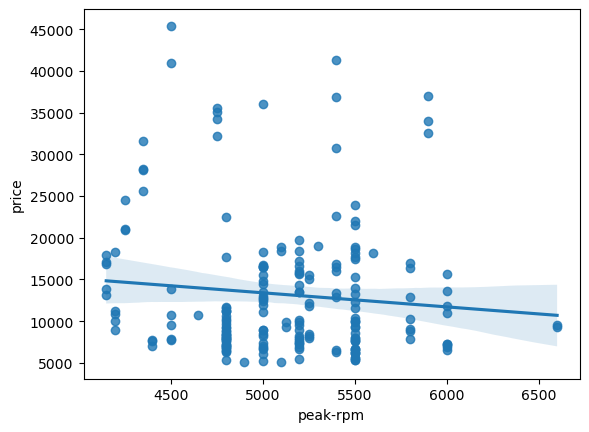

In [115]:
# peak- rpm is not a good indicator of the price as the regression line is very close to horizontal axis
sns.regplot(x='peak-rpm', y='price', data=df)

In [28]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


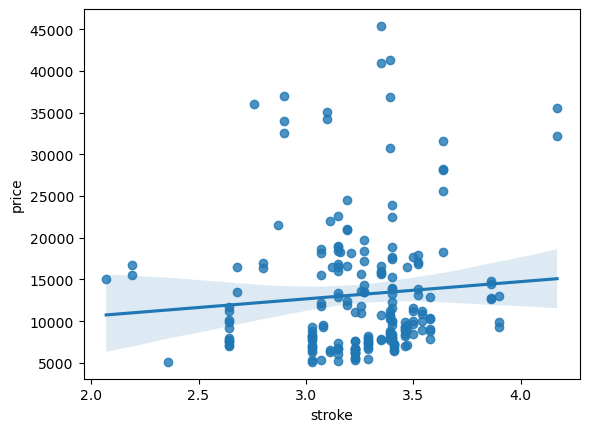

In [29]:
sns.regplot(x='stroke', y='price', data=df)
df[['stroke', 'price']].corr()

<Axes: xlabel='body-style', ylabel='price'>

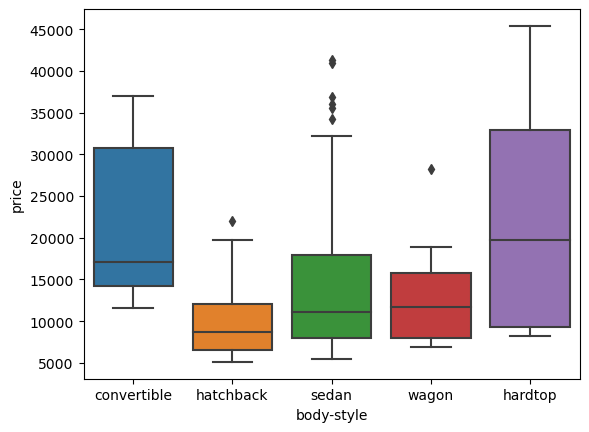

In [30]:
# Undestand the relationship between categorical variables and price.
# significant overlap between body style and price
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

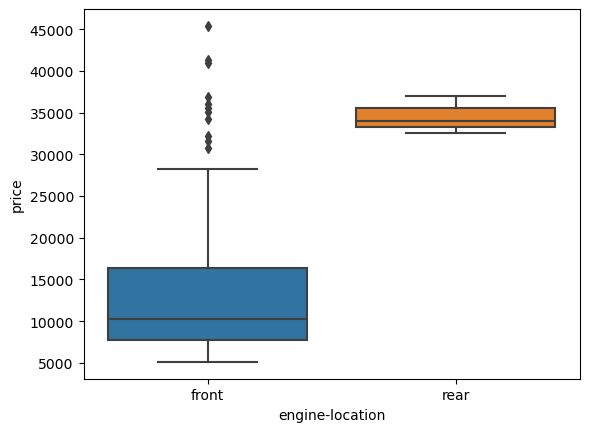

In [31]:
#take engine-location as a potential good predictor of price.
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

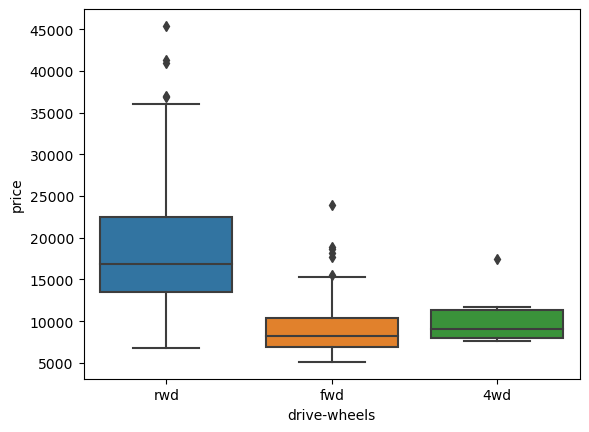

In [32]:
#drive-wheels could potentially be a predictor of price
sns.boxplot(x="drive-wheels", y="price", data=df)

In [33]:
df.describe(include=['object'])

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8
top,toyota,gas,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,115,94,118,198,145,157,92


In [34]:
# engine location is not a good to predict the price as the results is skewed.
engine_loc_counts = df['engine-location'].value_counts().rename_axis('engine-location').reset_index(name='value_counts')
engine_loc_counts.head(10)

,engine-location,value_counts
0,front,198
1,rear,3


In [35]:
# Drive wheels
drive_wheels_counts = df['drive-wheels'].value_counts().rename_axis('drive-wheels').reset_index(name='value_counts')
drive_wheels_counts.head(10)

,drive-wheels,value_counts
0,fwd,118
1,rwd,75
2,4wd,8


In [36]:
# Grouping and understand the price
df_group1 = df.groupby('drive-wheels')

In [37]:
df_group1['price'].mean()

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [39]:
#Group by both drive wheels and body- style
pivot_table = df.pivot_table(index='drive-wheels', columns='body-style', values='price', aggfunc='mean')
pivot_table.fillna(0)

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.0,0.000000,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


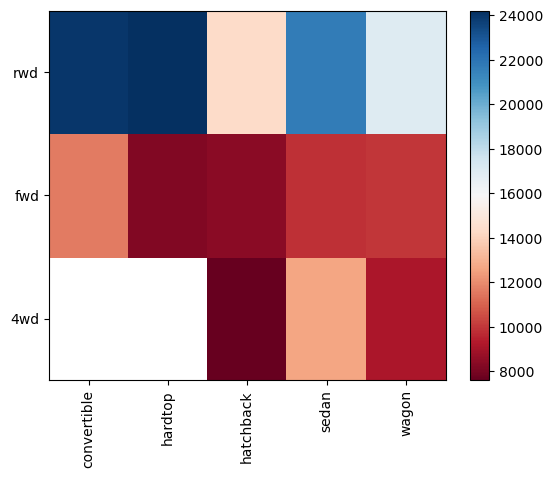

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots()
im = ax.pcolor(pivot_table, cmap='RdBu')

# Label names
row_labels = pivot_table.columns
col_labels = pivot_table.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(pivot_table.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot_table.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate labels if too long
plt.xticks(rotation=90)

# Add color bar
fig.colorbar(im)

# Display the plot
plt.show()

### Correlations 


In [41]:
# p-value is< 0.001, the correlation between wheel-base and price is statistically significant
# extremely small p-value indicates that this correlation is statistically significant, meaning it's highly unlikely to be due to random chance
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('pearson_coef', pearson_coef)
print('p_value',p_value)

pearson_coef 0.5846418222655081
p_value 8.076488270732885e-20


In [42]:
# All the p-values shows statisticlly significant  relationship to the price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print('For Length and price pearson_coef is', pearson_coef, 'and p_value is',p_value)
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('For Width and price pearson_coef is', pearson_coef, 'and p_value is',p_value)
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('For curb-weight and price pearson_coef is', pearson_coef, 'and p_value is',p_value)
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('For engine size and price pearson_coef is', pearson_coef, 'and p_value is',p_value)
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print('For bore and price pearson_coef is', pearson_coef, 'and p_value is',p_value)
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('For city-mpg and price pearson_coef is', pearson_coef, 'and p_value is',p_value)

For Length and price pearson_coef is 0.690628380448364 and p_value is 8.016477466158868e-30
For Width and price pearson_coef is 0.7512653440522672 and p_value is 9.20033551048206e-38
For curb-weight and price pearson_coef is 0.8344145257702846 and p_value is 2.1895772388937294e-53
For engine size and price pearson_coef is 0.8723351674455185 and p_value is 9.265491622198793e-64
For bore and price pearson_coef is 0.5431553832626602 and p_value is 8.049189483935315e-17
For city-mpg and price pearson_coef is -0.6865710067844677 and p_value is 2.3211320655676474e-29


### ANOVA: Analysis of Variance

In [43]:
# Group prices by drive wheels categories
group1 = df[df['drive-wheels'] == 'fwd']['price']
group2 = df[df['drive-wheels'] == 'rwd']['price']
group3 = df[df['drive-wheels'] == '4wd']['price']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 67.95406500780399
P-Value: 3.3945443577151245e-23


In [44]:
f_statistic, p_value = stats.f_oneway(group1, group2)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 130.5533160959111
P-Value: 2.2355306355677845e-23


In [45]:
f_statistic, p_value = stats.f_oneway(group1, group3)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 0.6654657502523033
P-Value: 0.41620116697845666


In [46]:
f_statistic, p_value = stats.f_oneway(group2, group3)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 8.580681368924756
P-Value: 0.004411492211225333


## Model Development
### Linear Regression and Multiple Linear Regression

In [47]:
# How could "highway-mpg" help us predict car price using simple Linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [48]:
df =pd.read_csv('clean_df.csv')
df

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower_bin,fuel_diesel,fuel_gas,aspiration_std,aspiration_turbo
0,0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,0.324786,0.083333,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.413433,0.324786,0.083333,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.449254,0.444444,0.383333,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.529851,0.504274,0.541667,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.529851,0.521368,0.541667,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,-1,95,volvo,gas,four,sedan,rwd,front,109.1,0.711940,0.735043,0.641667,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845.0,Low,0,1,1,0
197,197,-1,95,volvo,gas,four,sedan,rwd,front,109.1,0.711940,0.726496,0.641667,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045.0,Medium,0,1,0,1
198,198,-1,95,volvo,gas,four,sedan,rwd,front,109.1,0.711940,0.735043,0.641667,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485.0,Medium,0,1,1,0
199,199,-1,95,volvo,diesel,four,sedan,rwd,front,109.1,0.711940,0.735043,0.641667,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470.0,Low,1,0,0,1


In [165]:
df.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'horsepower_bin', 'fuel_diesel', 'fuel_gas', 'aspiration_std',
       'aspiration_turbo'],
      dtype='object')

In [49]:
X = df[['highway-mpg']]
Y = df['price']

In [50]:
lm.fit(X,Y)

LinearRegression()

In [51]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [52]:
lm.intercept_

38423.305858157386

In [53]:
lm.coef_

array([-821.73337832])

final estimated linear model using highway-mpg
Price = 38423.31 - 821.73 x highway-mpg

In [54]:
# How could "engine-size" help us predict car price using simple Linear regression
lm1 = LinearRegression()
lm1

LinearRegression()

In [55]:
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [56]:
Yhat=lm1.predict(X)
Yhat[0:5] 

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [57]:
lm1.intercept_

-7963.338906281049

In [58]:
lm.coef_

array([-821.73337832])

##### final estimated linear model using engine size
Price = -7963.34 + 166.86 x engine-size

#### Regression Plot
#### Model Evaluation Using Visualization

(0.0, 48169.85777642875)

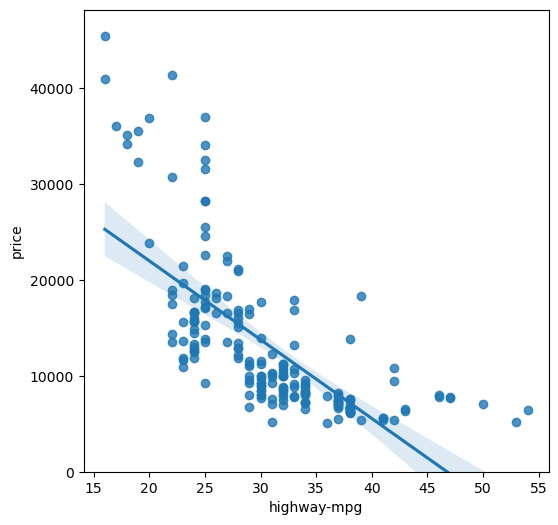

In [59]:
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 53493.25613236233)

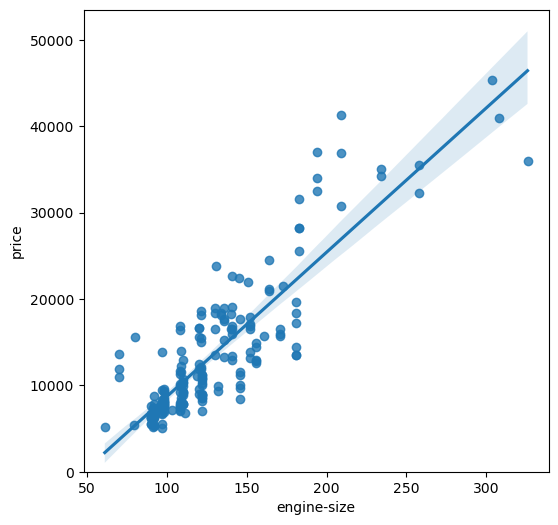

In [60]:
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [61]:
# Check the correlation. 
df[["engine-size","highway-mpg","price"]].corr()

,engine-size,highway-mpg,price
engine-size,1.000000,-0.679571,0.872335
highway-mpg,-0.679571,1.000000,-0.704692
price,0.872335,-0.704692,1.000000


### Multiple Linear Regression

##### 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

In [62]:
# develop a model using follwing variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [63]:
lm.intercept_  #value of the intercept(a)

-15811.863767729232

In [64]:
lm.coef_ #values of the coefficients (b1, b2, b3, b4)

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

##### Final Linear Regression  Function
###### Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

#### Model Evaluation
##### Residual Plot

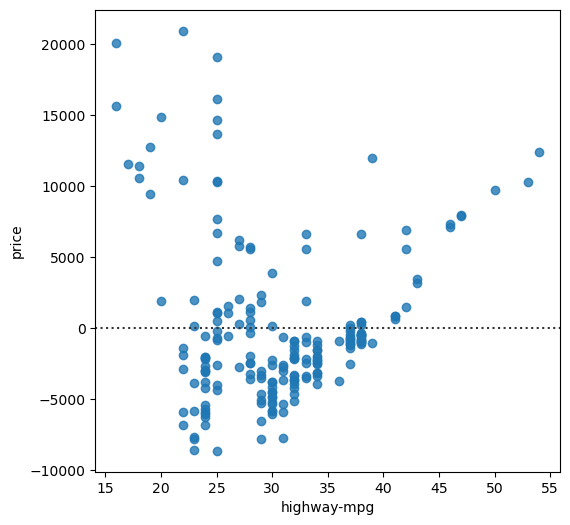

In [65]:
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

#####  If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.Residuals are not randomly spread around the x-axis, so that  maybe a non-linear model is more appropriate for this data.

### Quantative Evaluation

###### R Squared for Simple Linear Regression

In [67]:
X = df[['highway-mpg']]
Y = df['price']

In [68]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


##### 49.659% of the variation of the price is explained by this simple linear model Highway-mpg

In [70]:
# Predict First four values
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


##### Mean_squared_error for Simple Linear Regression

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


##### R Squared for Multiple Linear regression.

In [73]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


 ###### 80.896 % of the variation of price is explained by this multiple linear regression

In [74]:
# predict first four values
Y_predict_multifit = lm.predict(Z)
print('The output of the first four predicted value is: ', Y_predict_multifit[0:4])

The output of the first four predicted value is:  [13699.07700462 13699.07700462 19052.71346719 10620.61524404]


##### Mean Squeare Error for Multiple Regression

In [75]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.34981888


### Decision Making: Determining a Good Model Fit

###### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

**R-squared:** 0.49659118843391759
**MSE:** 3.16 x10^7

###### Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

**R-squared**: 0.80896354913783497
**MSE:** 1.2 x10^7

MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
R-squared:  There is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

### Conclusion
 MLR model is the best model to be able to predict price from our dataset